In [134]:
import numpy as np
import pandas as pd

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,11)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings 
warnings.filterwarnings('ignore')


In [136]:
import os
import pandas as pd

# Print current working directory
print("Current Working Directory:", os.getcwd())
# Load dataset
dataset = pd.read_csv("../Datasets/healthcare-dataset-stroke-data.csv")
print(dataset.head())


Current Working Directory: c:\Users\WELCOME\Desktop\disease prediction\disease-prediction-app\backend\app\utils
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0   

## pre processing

In [137]:
data=dataset.copy()

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [139]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [140]:
#filling mean
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [141]:
data.drop(columns=['id'],axis=1,inplace=True) 
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [142]:
categorical_var=['gender','ever_married','work_type','Residence_type','smoking_status']
numerical_var=['age','hypertension','heart_disease','avg_glucose_level','bmi']

In [143]:
print("number of unique variables")
print('work_type:',data['work_type'].unique())
print('gender:',data['gender'].unique())
print('Residence_type:',data['Residence_type'].unique())
print('ever"_married:',data['ever_married'].unique())
print('smoking_status:',data['smoking_status'].unique())
data['smoking_status'].replace('formerly smoked','former smoker',inplace=True)

number of unique variables
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
gender: ['Male' 'Female' 'Other']
Residence_type: ['Urban' 'Rural']
ever"_married: ['Yes' 'No']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [144]:
le=LabelEncoder() #creating an isntance of LabelEncoder class
smoking_status = le.fit_transform(data['smoking_status'])
gender = le.fit_transform(data['gender'])
ever_married = le.fit_transform(data['ever_married'])
Residence_type = le.fit_transform(data['Residence_type'])
work_type = le.fit_transform(data['work_type'])

In [145]:
#Replacing the above arrays in the data
data['work_type'] = work_type
data['gender'] = gender
data['Residence_type'] = Residence_type
data['ever_married'] = ever_married
data['smoking_status'] = smoking_status

In [146]:
bins=[0, 9, 19, 24, 59, float('inf')]
labels=['0-9', '10-19', '20-24', '25-59', '60 and above']
# Bin the ages into categories
data['age'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)
# Label encode the age groups
le = LabelEncoder()
data['age']=le.fit_transform(data['age'])
# Display the mappings
print("Label Encoding Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
# Display the DataFrame
print(data)


Label Encoding Mapping: {'0-9': 0, '10-19': 1, '20-24': 2, '25-59': 3, '60 and above': 4}
      gender  age  hypertension  heart_disease  ever_married  work_type  \
0          1    4             0              1             1          2   
1          0    4             0              0             1          3   
2          1    4             0              1             1          2   
3          0    3             0              0             1          2   
4          0    4             1              0             1          3   
...      ...  ...           ...            ...           ...        ...   
5105       0    4             1              0             1          2   
5106       0    4             0              0             1          3   
5107       0    3             0              0             1          3   
5108       1    3             0              0             1          2   
5109       0    3             0              0             1          0   

      Res

In [147]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,2,1,228.69,36.600000,1,1
1,0,4,0,0,1,3,0,202.21,28.893237,2,1
2,1,4,0,1,1,2,0,105.92,32.500000,2,1
3,0,3,0,0,1,2,1,171.23,34.400000,3,1
4,0,4,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,4,1,0,1,2,1,83.75,28.893237,2,0
5106,0,4,0,0,1,3,1,125.20,40.000000,2,0
5107,0,3,0,0,1,3,0,82.99,30.600000,2,0
5108,1,3,0,0,1,2,0,166.29,25.600000,1,0


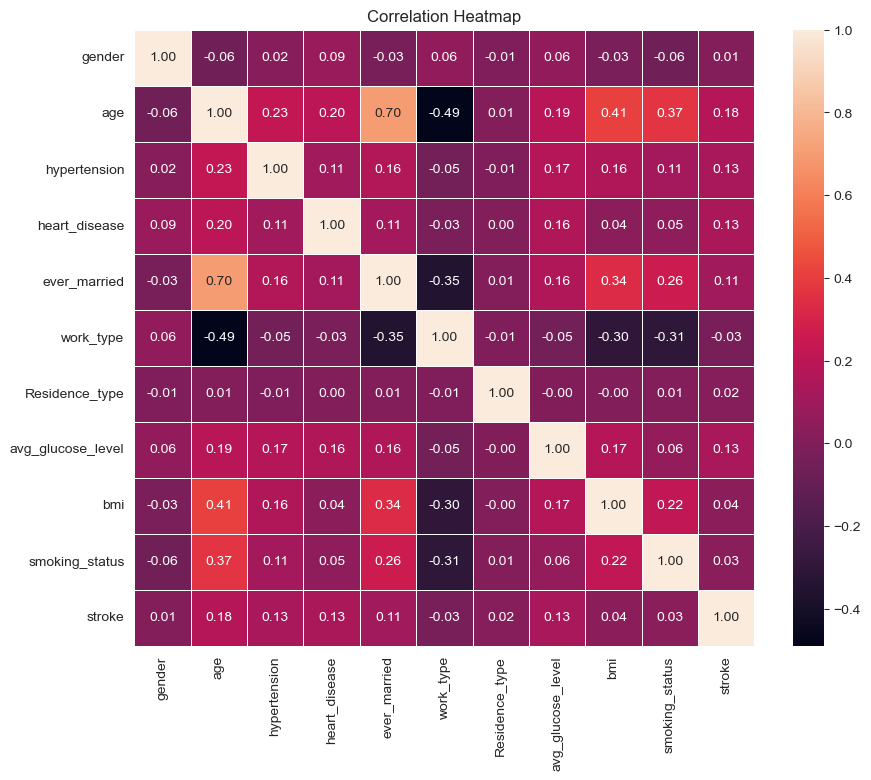

In [148]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [149]:
print(data['Residence_type'].value_counts())

1    2596
0    2514
Name: Residence_type, dtype: int64


Text(0.5, 1.0, 'Age vs Stroke')

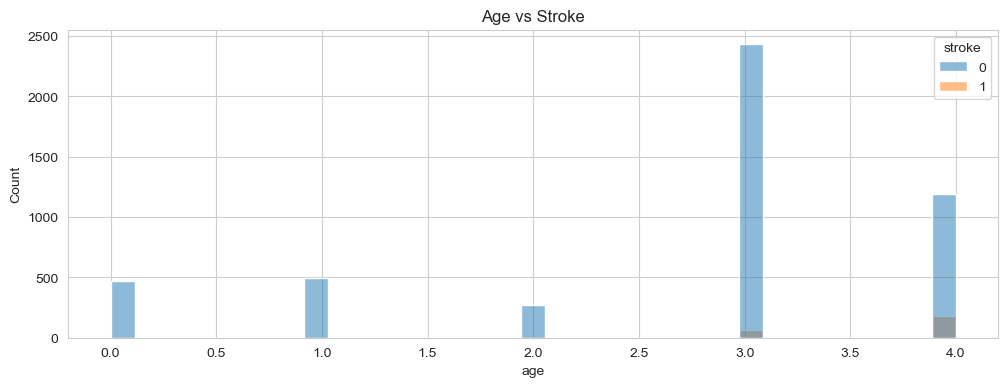

In [150]:
plt.figure(figsize=(12, 4))
pl = sns.histplot(x='age', data=data, hue='stroke', bins=35)
pl.set_title('Age vs Stroke')

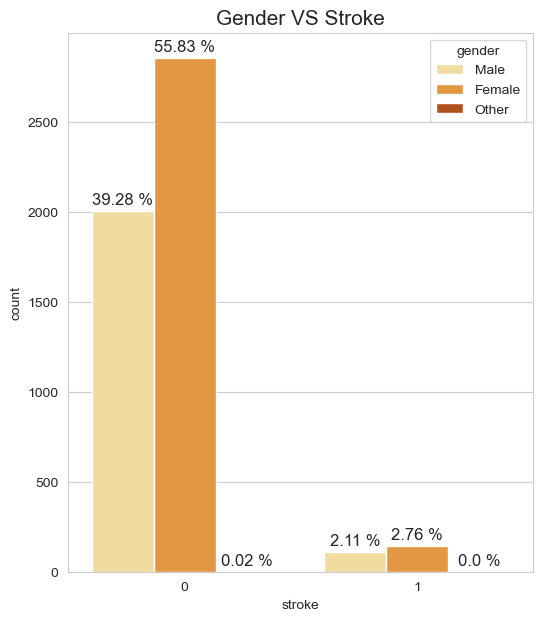

In [151]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize = (6,7))
ax=sns.countplot(x=data['stroke'],hue=dataset['gender'],palette = 'YlOrBr')
ax.set_title("Gender VS Stroke",fontsize = 15)

for j in ax.patches:
        ax.annotate(f'{round(j.get_height()/len(dataset)*100,2)} %', xy=(j.get_x() + j.get_width() / 2,  
            j.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

In [153]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [157]:
data1 = data.copy()
X = data.drop('stroke', axis = 1)
Y = data['stroke']
Y = pd.DataFrame(Y)
X=pd.DataFrame(X)

In [158]:
X.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'avg_glucose_level','bmi','smoking_status']
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,4,0,1,1,2,1,228.69,36.600000,1
1,0,4,0,0,1,3,0,202.21,28.893237,2
2,1,4,0,1,1,2,0,105.92,32.500000,2
3,0,3,0,0,1,2,1,171.23,34.400000,3
4,0,4,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,4,1,0,1,2,1,83.75,28.893237,2
5106,0,4,0,0,1,3,1,125.20,40.000000,2
5107,0,3,0,0,1,3,0,82.99,30.600000,2
5108,1,3,0,0,1,2,0,166.29,25.600000,1


## split dataset

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2 ,random_state =28)

In [160]:
Y_train.value_counts()

stroke
0         3888
1          200
dtype: int64

# training

### log regression

In [163]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_pred=LR.predict(X_test)
LR_Accuracy = accuracy_score(Y_test, Y_pred)
print(LR_Accuracy*100,'%')

95.2054794520548 %


In [164]:
CM = confusion_matrix(Y_test,Y_pred)
print(CM)

[[973   0]
 [ 49   0]]


In [165]:
import tensorflow as tf